In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import yfinance as yf 

In [2]:
def payoff(asset):
    
    payoff = pd.DataFrame(asset).pct_change()
    payoff = payoff.fillna(0)
    payoff = (payoff+1).cumprod()
    
    return payoff

In [3]:
def asset_ret(asset):
    ret = pd.DataFrame(asset).pct_change()
    ret = ret.fillna(0)
    ret = ret+1
    
    return ret

In [4]:
def volatility(list_asset):
    ret = pd.DataFrame(list_asset)
    ret = ret/ret.shift(1)
    ret = ret.fillna(1)
    log_ret = np.log(ret)
    volatility = log_ret.std() 
    return(volatility)

# Two uncorrelated assets with negative return

In [5]:
T=10000


sigma_1 = 0.50/np.sqrt(252)
sigma_2 = 0.50/np.sqrt(252)
mu_1 = -0.0000 + 0.5*sigma_1**2 #set the geometric mean
mu_2 = -0.0000 + 0.5*sigma_2**2 #set the geometric mean
S0 = 100
dt = 1
N = round(T/dt)
t = np.linspace(1, T, N)
W_1 = np.random.standard_normal(size = N) 
W_1 = np.cumsum(W_1)*np.sqrt(dt) ### standard brownian motion ###
X_1 = (mu_1-0.5*sigma_1**2)*t + sigma_1*W_1
S_1 = S0*np.exp(X_1) ### geometric brownian motion ###

W_2 = np.random.standard_normal(size = N) 
W_2 = np.cumsum(W_2)*np.sqrt(dt) ### standard brownian motion ###
X_2 = (mu_2-0.5*sigma_2**2)*t + sigma_2*W_2
S_2 = S0*np.exp(X_2) ### geometric brownian motion ###

In [6]:
init = 100
ret = []
as1_weight = (1/sigma_1)/(((1/sigma_1)+(1/sigma_2))) #risk parity
as2_weight = 1 - as1_weight
for i in range(T):
    ret.append(init)
    as_1 = init * as1_weight
    as_2 = init * as2_weight
        
    as_1 = float(as_1 * asset_ret(S_1).loc[i])
    as_2 = float(as_2 * asset_ret(S_2).loc[i])
        
    init = as_1 + as_2

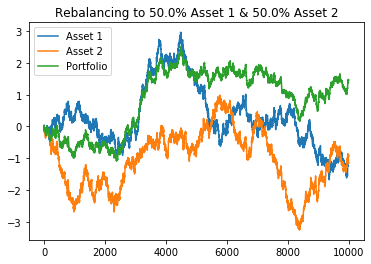

In [7]:
plt.plot(np.log(payoff(S_1)), label = "Asset 1")
plt.plot(np.log(payoff(S_2)), label = "Asset 2")
plt.plot(np.log(payoff(ret)), label = "Portfolio")
plt.legend();
plt.title("Rebalancing to " + str(round(as1_weight*100))+"% Asset 1 & "+ str(round(as2_weight*100))+"% Asset 2");

In [8]:
volatility(S_1)

0    0.031636
dtype: float64

In [9]:
volatility(S_2)

0    0.031655
dtype: float64

In [781]:
volatility(ret)

0    0.022613
dtype: float64